In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
import tensorflow as tf
import numpy as np
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt

# Parameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3

# Load the dataset (ensure this is the directory where your images are stored)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [5]:
# Function for thermal analysis
def thermal_analysis(image):
    # Convert image to grayscale to simulate temperature differences
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a color map to create a thermal effect (Jet colormap)
    thermal_map = cv2.applyColorMap(gray_image, cv2.COLORMAP_JET)
    
    # Thresholding to separate hot and cold regions
    _, hot_mask = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)
    _, cold_mask = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
    
    # Apply masks to isolate hot and cold areas
    hot_regions = cv2.bitwise_and(thermal_map, thermal_map, mask=hot_mask)
    cold_regions = cv2.bitwise_and(thermal_map, thermal_map, mask=cold_mask)
    
    # Calculate the average temperature (based on pixel intensity in grayscale image)
    avg_temperature = np.mean(gray_image)
    
    # Display the results
    plt.figure(figsize=(15, 5))
    
    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    # Thermal Map
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(thermal_map, cv2.COLOR_BGR2RGB))
    plt.title(f"Thermal Map\nAverage Temperature: {avg_temperature:.2f}°C")
    plt.axis("off")
    
    # Hot and Cold Regions
    plt.subplot(1, 3, 3)
    combined_map = cv2.addWeighted(hot_regions, 1, cold_regions, 0.5, 0)
    plt.imshow(cv2.cvtColor(combined_map, cv2.COLOR_BGR2RGB))
    plt.title("Hot and Cold Regions Segregated")
    plt.axis("off")
    
    plt.show()

    return avg_temperature


In [6]:
# Function to classify if the plant is diseased based on temperature and image analysis
def classify_disease_based_on_temperature(avg_temperature):
   
    if avg_temperature > 180:  # Simulated threshold, can be adjusted based on analysis
        disease_status = "Diseased"
    else:
        disease_status = "Healthy"
    
    return disease_status


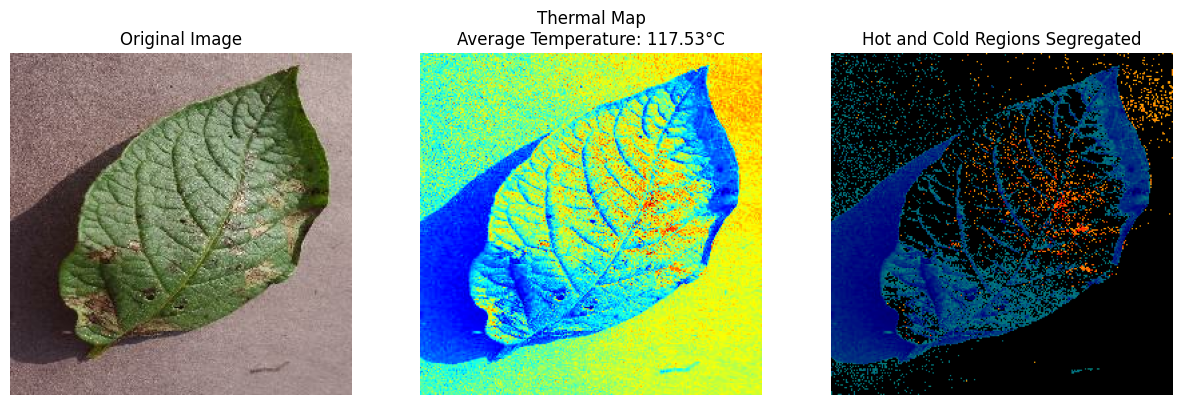

Average Temperature: 117.53°C
Disease Status: Healthy


In [7]:
# Example: Get a batch from the dataset and process one image
for images, labels in dataset.take(1):  # Take one batch
    sample_image = images[0].numpy().astype(np.uint8)  # Convert the first image to uint8 format
    sample_image_bgr = cv2.cvtColor(sample_image, cv2.COLOR_RGB2BGR) 
    
    # Run thermal analysis and get average temperature
    avg_temperature = thermal_analysis(sample_image_bgr)
    
    # Classify disease status based on thermal analysis
    disease_status = classify_disease_based_on_temperature(avg_temperature)
    
    # Display the result
    print(f"Average Temperature: {avg_temperature:.2f}°C")
    print(f"Disease Status: {disease_status}")
